# Grove ADC Sensor

In this notebook, the [Grove I2C ADC](http://www.seeedstudio.com/wiki/Grove_-_I2C_ADC) is initialized a test read is done, and then the sensor is set to log a reading every 1 second. The ADC can be connected to any Grove peripheral that provides an analog voltage. This example was tested with the [Grove slide potentiometer](http://www.seeedstudio.com/wiki/Grove_-_Slide_Potentiometer).

### 1. Simple ADC read()

In [1]:
from pynq.pl import Overlay
Overlay("pmod.bit").download()

In [2]:
from pynq.pmods import Grove_ADC

# Grove Stickit is connected to 1st PMOD (1) labeled JB, and Grove ADC is connected to GR 4 (4) 
grove_adc = Grove_ADC(1, 4)
grove_adc.read()

875

### 2. Starting logging once every second

In [3]:
grove_adc.set_log_interval_ms(1000)
grove_adc.start_log()

### 3. Try to change the input signal during the logging. 

For example, if using the Grove slide potentiometer, move the slider back and forth (slowly). 

Stop the logging whenever done trying to change sensor's value.

In [4]:
log = grove_adc.get_log()

### 4. Plot values over time

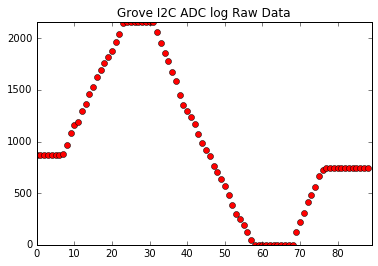

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(len(log)), log, 'ro')
plt.title('Grove I2C ADC log Raw Data')
plt.axis([0, len(log), min(log), max(log)])
plt.show()

The voltage from the ADC can also be read

In [6]:
grove_adc.read_voltage()

1.1923828125

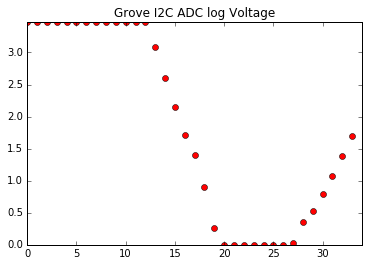

In [8]:
import time
grove_adc.set_log_interval_ms(1000)
grove_adc.start_log_voltage()

time.sleep(5) # Change input during this time

log = grove_adc.get_log_voltage()

%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(len(log)), log, 'ro')
plt.title('Grove I2C ADC log Voltage')
plt.axis([0, len(log), min(log), max(log)])
plt.show()